# Formulation Indroduction

In [ ]:

""" where a gridWorld can be made 
    with start and goal state 
    agent will use q_learning method 
    to make a policy 
    that will help to take decisions...
    ...(U(up),D(down),L(left),R(right))


GridWord of size (5,5):

Start S(0,0)
Goal G(4,4)
    
[['S',  ' ' ,  ' ' ,  ' ' ,  ' ' ],  
[ ' ' ,  ' ' ,  ' ' ,  ' ' ,  ' ' ],  
[ ' ' ,  ' ' ,  ' ' ,  ' ' ,  ' ' ],  
[ ' ' ,  ' ' ,  ' ' ,  ' ' ,  ' ' ],  
[ ' ' ,  ' ' ,  ' ' ,  ' ' ,  'G' ]]

"""

## Lets see some '*random*' library operations

In [1]:
import random

random.uniform(0, 1)

0.5702230079723931

In [134]:
random.choice([0, 1, 2, 3])

1

In [146]:
random.choice(['a',2,'c',True])

'c'

## Lets see some *'numpy'* library operations

In [152]:
np.zeros((3, 3, 2))         # returns desired shape of zeros array 

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [149]:
np.argmax([4,1,2,8,1,4,2])   # returns the index of highest value 


3

In [150]:
np.max([4,1,2,8,1,4,2])      # returns the highest value 

8

In [151]:
np.full((5,5),'',dtype='str')

array([['', '', '', '', ''],
       ['', '', '', '', ''],
       ['', '', '', '', ''],
       ['', '', '', '', ''],
       ['', '', '', '', '']], dtype='<U1')

In [2]:
import numpy as np
import random

# Define the environment (a grid world)
class GridWorld:
    def __init__(self, size, start, goal):
        self.size = size
        self.start = start
        self.goal = goal
        self.reset()

    def reset(self):              
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state

        # Define the possible actions: up, down, left, right
        actions = {                                                       # to make move
            0: (-1, 0),  # up
            1: (1, 0),   # down
            2: (0, -1),  # left
            3: (0, 1)    # right
        }

        dx, dy = actions[action]
        new_state = (x + dx, y + dy)

        # Check for boundary conditions
        if 0 <= new_state[0] < self.size[0] and 0 <= new_state[1] < self.size[1]:        # to validate
            self.state = new_state

        reward = 1 if self.state == self.goal else -0.1                                  # to reward
        done = self.state == self.goal                                                   # to done (True or False)

        return self.state, reward, done

    def get_state_space(self):       
        return [(x, y) for x in range(self.size[0]) for y in range(self.size[1])]
 
    def get_action_space(self):      
        return [0, 1, 2, 3]  # up, down, left, right

# Initialize environment
size = (5, 5)  # 5x5 grid
start = (0, 0)
goal = (4, 4)
env = GridWorld(size, start, goal)

# Q-learning parameters
q_table = np.zeros((size[0], size[1], len(env.get_action_space())))
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.1
episodes = 50000

# Q-learning algorithm
for episode in range(episodes):
    state = env.reset()
    done = False

    while not done:
        x, y = state

        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = random.choice(env.get_action_space())         # chooses one from [0(UP), 1(DOWN), 2(LEFT), 3(RIGHT)] with exploration
        else:
            action = np.argmax(q_table[x, y])                      # chooses one from [0, 1, 2, 3] with exploitation

        # Take action and observe outcome
        next_state, reward, done = env.step(action)
        nx, ny = next_state

        # Update Q-value
        q_table[x, y, action] = q_table[x, y, action] + learning_rate * (
            reward + discount_factor * np.max(q_table[nx, ny]) - q_table[x, y, action]
        )

        state = next_state

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# Display the optimal policy
optimal_policy = np.full(size, ' ', dtype=str)
for x in range(size[0]):
    for y in range(size[1]):
        if (x, y) == goal:
            optimal_policy[x, y] = 'G'  # Goal
        else:
            best_action = np.argmax(q_table[x, y])
            if best_action == 0:
                optimal_policy[x, y] = 'U'  # Up
            elif best_action == 1:
                optimal_policy[x, y] = 'D'  # Down
            elif best_action == 2:
                optimal_policy[x, y] = 'L'  # Left
            elif best_action == 3:
                optimal_policy[x, y] = 'R'  # Right

print("Optimal Policy:")
print(optimal_policy)


Optimal Policy:
[['D' 'D' 'D' 'R' 'D']
 ['D' 'D' 'D' 'R' 'D']
 ['D' 'D' 'D' 'R' 'D']
 ['R' 'D' 'D' 'D' 'D']
 ['R' 'R' 'R' 'R' 'G']]


In [3]:
q_table

array([[[0.15019164, 0.25271883, 0.15019164, 0.25271883],
        [0.25271883, 0.35628164, 0.15019164, 0.35628164],
        [0.35628164, 0.46089055, 0.25271883, 0.46089055],
        [0.36054058, 0.39459337, 0.24229795, 0.56655611],
        [0.41015704, 0.673289  , 0.270711  , 0.43482306]],

       [[0.15019164, 0.35628164, 0.25271883, 0.35628164],
        [0.25271883, 0.46089055, 0.25271883, 0.46089055],
        [0.35628164, 0.56655611, 0.35628164, 0.56655611],
        [0.43340079, 0.6631258 , 0.41968193, 0.673289  ],
        [0.56433975, 0.7811    , 0.56262136, 0.6726539 ]],

       [[0.25271883, 0.46089055, 0.35628164, 0.46089055],
        [0.35628164, 0.56655611, 0.35628164, 0.56655611],
        [0.46089055, 0.673289  , 0.46089055, 0.673289  ],
        [0.56655611, 0.7811    , 0.56655611, 0.7811    ],
        [0.673289  , 0.89      , 0.673289  , 0.7811    ]],

       [[0.35628164, 0.56655611, 0.46089055, 0.56655611],
        [0.46089055, 0.673289  , 0.46089055, 0.673289  ],
        

In [ ]:

##     _________Up____________Down________Left_________Right____   
##         [ 0.15019164,  0.25271883,  0.15019164,  0.25271883],      # for (0,0) cell
##         [ 0.25271883,  0.35628164,  0.15019164,  0.35628164],      # for (0,1) cell
##         [ 0.35628164,  0.46089055,  0.25271883,  0.46089055],      # for (0,2) cell
##         [ 0.04310354,  0.56655611,  0.21003568,  0.13002597],      # for (0,3) cell
##         [-0.16048427,  0.48270146, -0.0462724 , -0.16018877]],     # for (0,4) cell
##         ...


In [114]:
q_table[0][0]

array([0.15019164, 0.25271883, 0.15019164, 0.25271883])

In [110]:
np.argmax(q_table[0][0]) # index : 1 means DOWN (has higher value)

1

In [153]:

act = {0:'U',
      1:'D',
      2:'L',
      3:'R'}

for i in range(len(q_table[0])):
    for j in range(len(q_table[1])):
        if (i,j) == goal:
            print('G', end='  ')
        else:
            print(act[np.argmax(q_table[i][j])], end='  ')
    print()
            

D  D  D  D  D  
D  D  D  D  D  
D  D  D  D  D  
R  D  D  D  D  
R  R  R  R  G  


# Visualization 1

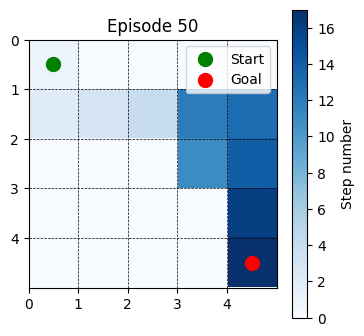

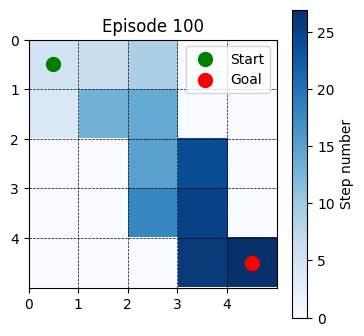

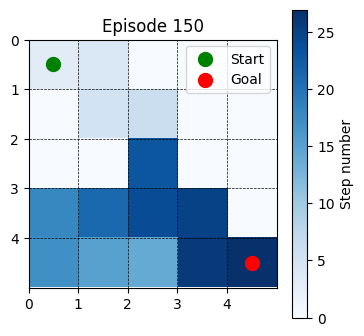

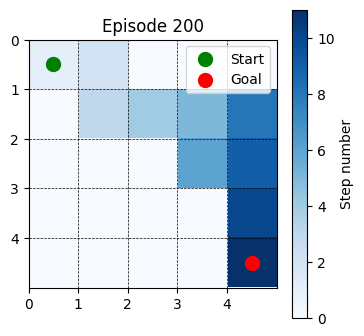

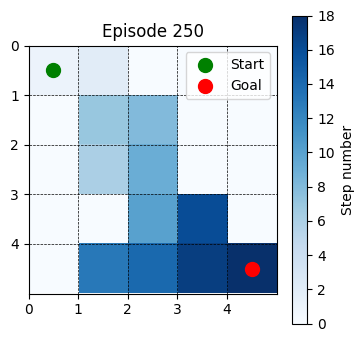

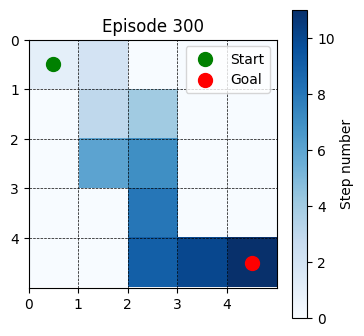

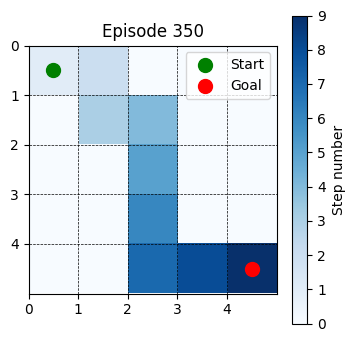

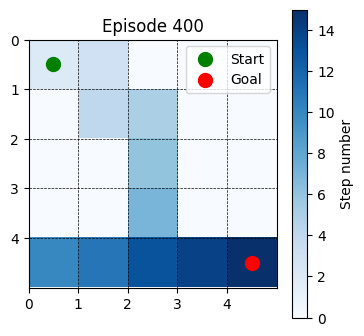

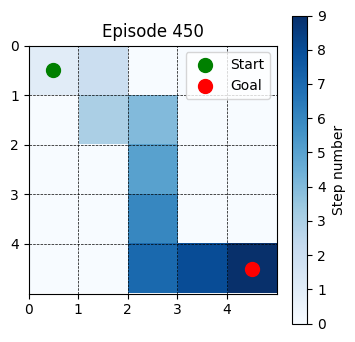

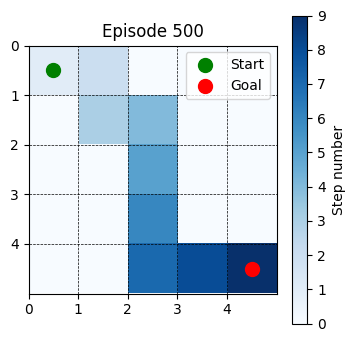

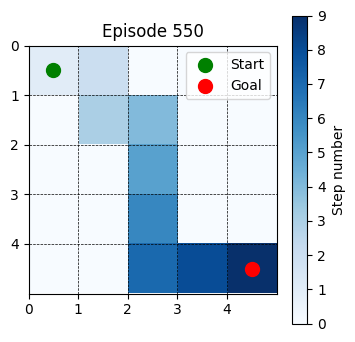

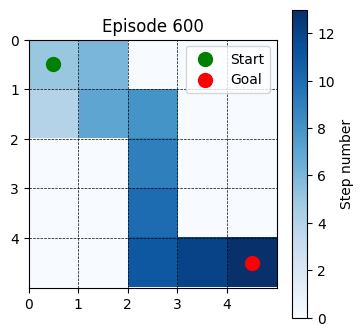

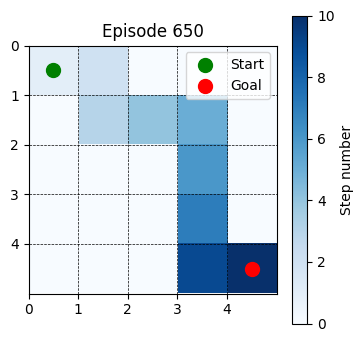

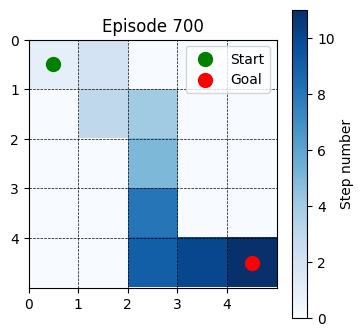

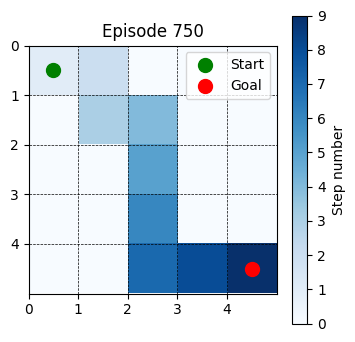

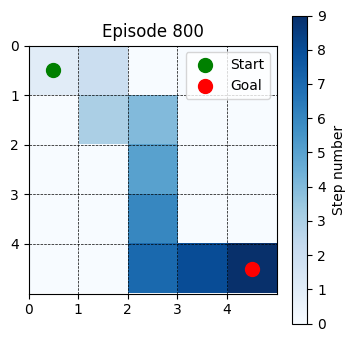

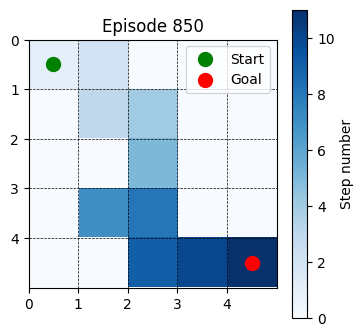

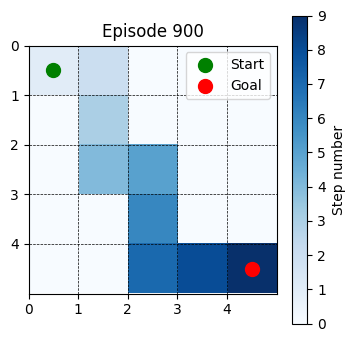

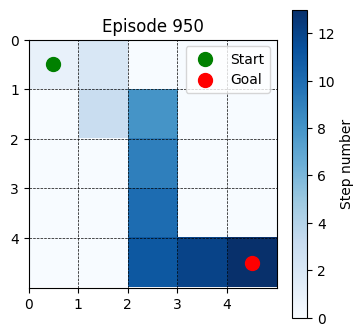

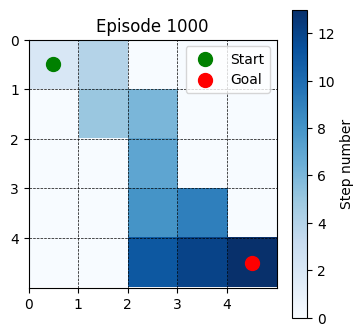

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Function to visualize the agent's trajectory
def visualize_trajectory(env, q_table, episode, trajectory):
    grid = np.zeros(env.size)
    for step, (x, y) in enumerate(trajectory):
        grid[x, y] = step + 1  # Mark the trajectory steps

    plt.figure(figsize=(4, 4))
    plt.imshow(grid, cmap="Blues", origin="upper", extent=(0, env.size[1], env.size[0], 0))
    plt.colorbar(label="Step number")
    plt.title(f"Episode {episode}")
    plt.scatter(env.start[1] + 0.5, env.start[0] + 0.5, color="green", label="Start", s=100)
    plt.scatter(env.goal[1] + 0.5, env.goal[0] + 0.5, color="red", label="Goal", s=100)
    plt.xticks(range(env.size[1]))
    plt.yticks(range(env.size[0]))
    plt.grid(True, which="both", color="black", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()

# Initialize environment
size = (5, 5)  # 5x5 grid
start = (0, 0)
goal = (4, 4)
env = GridWorld(size, start, goal)

# Q-learning parameters
q_table = np.zeros((size[0], size[1], len(env.get_action_space())))
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.1
training_episodes = 1000  # Reduce training episodes for visualization
visualize_every = 50  # Visualize every 50 episodes

# Q-learning algorithm
for episode in range(training_episodes):
    state = env.reset()
    done = False

    trajectory = [state]  # To record the path taken by the agent

    while not done:
        x, y = state

        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = random.choice(env.get_action_space())  # Exploration
        else:
            action = np.argmax(q_table[x, y])  # Exploitation

        # Take action and observe outcome
        next_state, reward, done = env.step(action)
        nx, ny = next_state

        # Update Q-value
        q_table[x, y, action] = q_table[x, y, action] + learning_rate * (
            reward + discount_factor * np.max(q_table[nx, ny]) - q_table[x, y, action]
        )

        state = next_state
        trajectory.append(state)

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Visualize at specified intervals
    if (episode + 1) % visualize_every == 0:
        visualize_trajectory(env, q_table, episode + 1, trajectory)


![Image](q_learning_equation.png)

In [ ]:
# simplified explaination how equation helps and make able to learn agent how to reach goal with best action